# Statistika 2 

## 1. Aprašomoji statistika su `pandas.describe()`
Šiame pavyzdyje apskaičiuojame pagrindinius aprašomosios statistikos rodiklius (vidurkį, medianą, modą, dispersiją, standartinį nuokrypį, pasvirimą ir kurtosis), taip pat parodome histogramą su KDE ir boxplot. 

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
Vidurkis: 19.78594262295082
Mediana: 17.795
Moda: 13.42
Dispersija: 79.25293861397827
Standartinis nuokrypis: 8.902411954856856
Pasvirimas (skew): 1.1332130376158205
Kurtosis: 1.2184840156638854


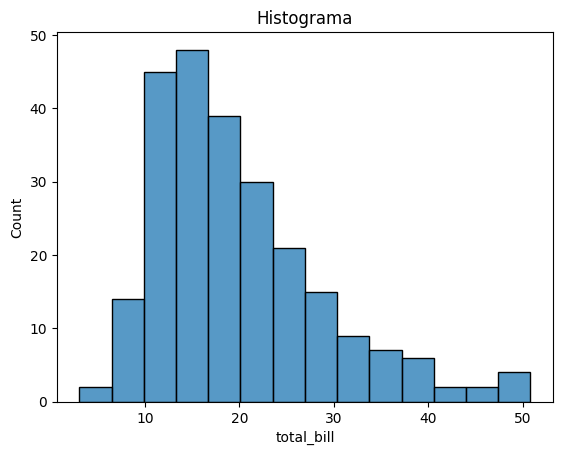

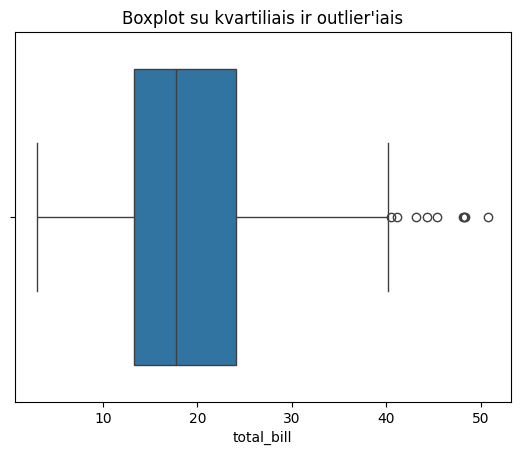

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pavyzdinis duomenų rinkinys
df = sns.load_dataset("tips")

# Aprašomoji statistika
print(df.describe())  # mean, std, min, max, quartiles

# Atskirai – centrinės tendencijos
print("Vidurkis:", df["total_bill"].mean())
print("Mediana:", df["total_bill"].median())
print("Moda:", df["total_bill"].mode()[0])

# Dispersija ir std
print("Dispersija:", df["total_bill"].var())
print("Standartinis nuokrypis:", df["total_bill"].std())

# Pasvirimas ir kurtosis
print("Pasvirimas (skew):", df["total_bill"].skew())
print("Kurtosis:", df["total_bill"].kurt())

# Vizualizacijos
sns.histplot(df["total_bill"])
plt.title("Histograma")
plt.show()

sns.boxplot(x=df["total_bill"])
plt.title("Boxplot su kvartiliais ir outlier'iais")
plt.show()

## 📏 Rekomenduojamos skew ir kurtosis reikšmės

### 1. Skewness (pasvirimas)
- **0** → visiškai simetriškas pasiskirstymas (pvz., normalusis skirstinys).
- **Priimtina**:
  - **|skew| < 0.5** → pasiskirstymas laikomas beveik simetrišku
  - **0.5 ≤ |skew| < 1** → vidutinis pasvirimas
  - **|skew| ≥ 1** → stiprus pasvirimas (dažnai verta transformuoti duomenis: log, sqrt ir pan.)

---

### 2. Kurtosis (viršūnės smailumas)
*(Pearson excess kurtosis, kur normalusis skirstinys ≈ 0)*

- **0** → panašu į normalų skirstinį (nei per plokščias, nei per smailus).
- **Priimtina**:
  - **|kurt| < 1** → viršūnės forma artima normaliai
  - **1 ≤ |kurt| < 2** → vidutiniškai skiriasi nuo normalios
  - **|kurt| ≥ 2** → labai plokščias (platykurtic) arba labai smailus (leptokurtic) skirstinys → gali reikšti outlier’ių perteklių

---

💡 **Praktinė interpretacija**:
- Maži **|skew|** ir **|kurt|** → duomenys tinkami daugeliui klasikinių statistinių metodų.
- Dideli **|skew|** → duomenys pasvirę, galbūt reikia transformacijos.
- Dideli **|kurt|** → daug outlier’ių arba sunkios uodegos, reikia papildomos analizės.

## 2. Kvartiliai (Q0–Q4) ir IQR
Skaičiuojame Q0–Q4, IQR ir identifikuojame galimus outlier’ius pagal 1.5×IQR taisyklę. Taip pat braižome boxplot su pavadinimu.

Q0 (Min): 3.07
Q1 (25%): 13.3475
Q2 (Median): 17.795
Q3 (75%): 24.127499999999998
Q4 (Max): 50.81
IQR: 10.779999999999998
Outlier'iai:
 59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64


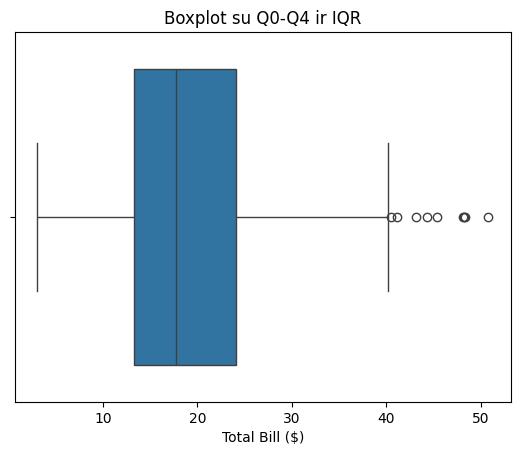

In [2]:
import pandas as pd
import seaborn as sns

# Naudosime vieną skaitinį stulpelį
df = sns.load_dataset("tips")["total_bill"]

q0 = df.min()
q1 = df.quantile(0.25)
q2 = df.quantile(0.50)
q3 = df.quantile(0.75)
q4 = df.max()
iqr = q3 - q1

print(f"Q0 (Min): {q0}")
print(f"Q1 (25%): {q1}")
print(f"Q2 (Median): {q2}")
print(f"Q3 (75%): {q3}")
print(f"Q4 (Max): {q4}")
print(f"IQR: {iqr}")

# Galimi outlier'iai pagal 1.5*IQR taisyklę
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df < lower_bound) | (df > upper_bound)]
print("Outlier'iai:\n", outliers)

# Boxplot vizualizacija su žyme
import matplotlib.pyplot as plt
sns.boxplot(x=df)
plt.title("Boxplot su Q0-Q4 ir IQR")
plt.xlabel("Total Bill ($)")
plt.show()

## 3. KDE kreivė – histograma su glotnia tankio kreive
Šis pavyzdys (kartojasi su 1 skyriumi) akcentuoja KDE reikšmę – ji padeda įvertinti simetriją, pasvirimą ir galimus kelių viršūnių pasiskirstymus.

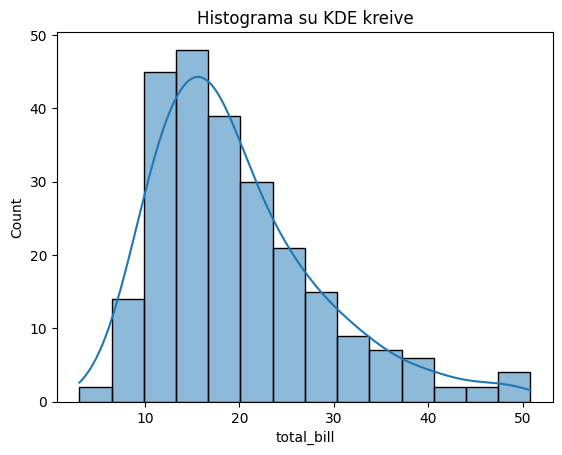

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

# Histograma + KDE kreivė
sns.histplot(tips["total_bill"], kde=True)
plt.title("Histograma su KDE kreive")
plt.show()

## 4. Boxplot su Seaborn (grupavimas pagal kategoriją)
Naudojame `seaborn.boxplot` tam, kad palygintume skirstinius per kategorijas (šiame pavyzdyje – dienas).

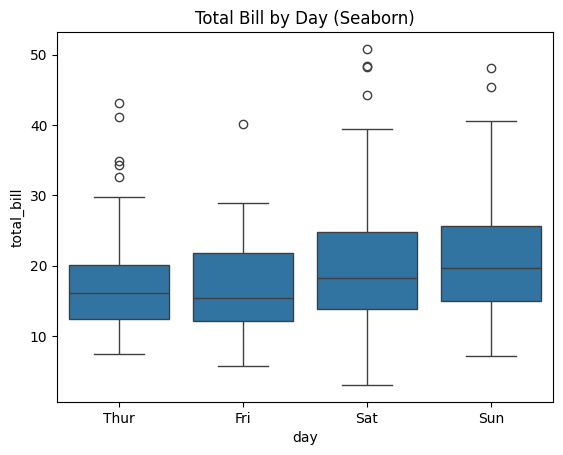

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
sns.boxplot(data=tips, x="day", y="total_bill")
plt.title("Total Bill by Day (Seaborn)")
plt.show()

## 5. Boxplot su Matplotlib (didesnė kontrolė)
Čia naudojame gryną `matplotlib` dėžutėms braižyti, kad galėtume pilnai valdyti išdėstymą, etiketes ir papildomas parinktis (pvz., `showmeans=True`). Pastaba: ši ląstelė remiasi, kad kintamasis `tips` jau apibrėžtas ankstesnėje ląstelėje.

## Boxplot parodo:
#### Dėžutę (box) nuo Q1 iki Q3.
#### Vidinę liniją-medianą (Q2).
#### Ūsus (whiskers)-paprastai tęsiasi iki min (Q0) ir max (Q4), jei nėra outlier’ių, arba iki didžiausios reikšmės neviršijančios 1.5×IQR ribos.
#### Taškus-galimus outlier’ius.

In [5]:
tips.groupby("day",observed=False)["total_bill"].sum()

day
Thur    1096.33
Fri      325.88
Sat     1778.40
Sun     1627.16
Name: total_bill, dtype: float64

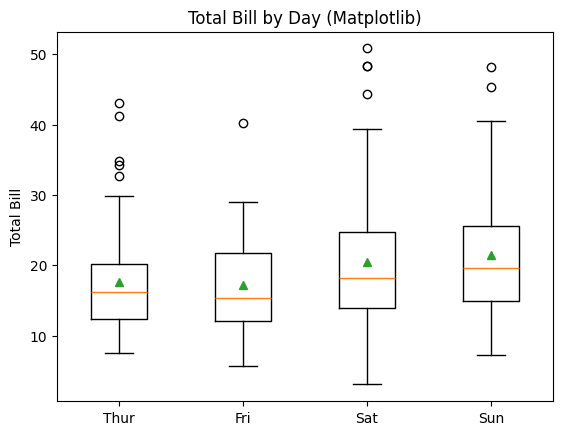

In [6]:
import matplotlib.pyplot as plt

groups = tips.groupby("day", observed=True)["total_bill"]
data = [g[1].values for g in groups]
labels = [g[0] for g in groups]
plt.boxplot(data, tick_labels=labels, showmeans=True)
plt.title("Total Bill by Day (Matplotlib)")
plt.ylabel("Total Bill")
plt.show()

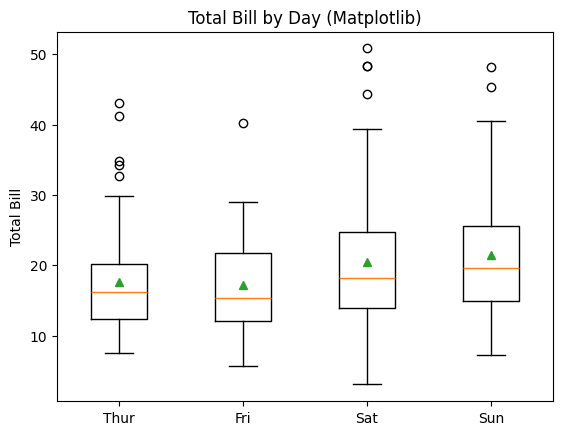

In [7]:
import matplotlib.pyplot as plt

groups = tips.groupby("day", observed=True)["total_bill"]
data = [group.tolist() for _, group in groups]
labels = list(groups.groups.keys())  
plt.boxplot(data, tick_labels=labels, showmeans=True)
plt.title("Total Bill by Day (Matplotlib)")
plt.ylabel("Total Bill")
plt.show() 

In [8]:
groups.mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

## 6. Interaktyvus boxplot su Plotly Express
Interaktyvus grafikas: hover, zoom, legendos filtravimas. Papildomai parodome, kaip išsaugoti kaip **interaktyvų HTML** failą dalinimuisi.

In [9]:
import plotly.express as px

fig = px.box(tips, x="day", y="total_bill", points="outliers",
             title="Total Bill by Day (Plotly-interactive)")
fig.show()  # Jupyter'e – interaktyvu
fig.write_html("plot.html")  # Interaktyvų HTML

In [ ]:
# pip install dash 

In [11]:
import dash
from dash import html, dcc
import plotly.express as px
import pandas as pd

# Duomenys
df = px.data.iris()

# Sukuriam aplikaciją
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Iris Dataset Scatter Plot"),
    dcc.Dropdown(
        id='species-filter',
        options=[{'label': sp, 'value': sp} for sp in df['species'].unique()],
        value='setosa'
    ),
    dcc.Graph(id='scatter-plot')
])

# Callback funkcija interaktyvumui
@app.callback(
    dash.Output('scatter-plot', 'figure'),
    dash.Input('species-filter', 'value')
)
def update_graph(selected_species):
    filtered_df = df[df['species'] == selected_species]
    fig = px.scatter(filtered_df, x='sepal_width', y='sepal_length')
    return fig

# Paleidžiam
if __name__ == '__main__':
    app.run(debug=True)

In [12]:
import dash
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import pandas as pd

# Data
df = px.data.iris()
all_species = sorted(df['species'].unique())

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Iris Dataset Scatter Plot"),
    dcc.Dropdown(
        id='species-filter',
        options=[{'label': sp, 'value': sp} for sp in all_species],
        value=all_species,          # default: select all
        multi=True,                
        placeholder="Choose species..."
    ),
    dcc.Graph(id='scatter-plot')
])

@app.callback(
    Output('scatter-plot', 'figure'),
    Input('species-filter', 'value')
)
def update_graph(selected_species):
    # selected_species will be a list (or None)
    if not selected_species:  # None or []
        # Show empty figure or all data; here we show empty
        return px.scatter(title="No species selected")

    filtered_df = df[df['species'].isin(selected_species)]
    fig = px.scatter(
        filtered_df, x='sepal_width', y='sepal_length',
        color='species',  # helpful when multiple species
        title=f"Iris Scatter ({', '.join(selected_species)})"
    )
    return fig

if __name__ == '__main__':
    app.run(debug=True)